#### Tugas

1. Terapkan konsep kompresi citra menggunakan image pilihan sendiri

In [1]:
# melalukan import library
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

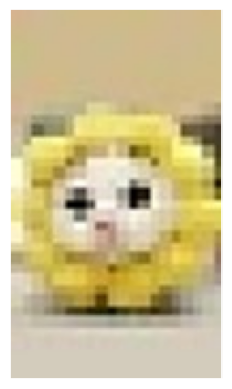

In [2]:
# Import matplotlib maodul untuk membaca gambar dan membuat diagram
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Membaca Gambar
cat = mpimg.imread('data/cat.jpeg')
ax = plt.axes(xticks=[], yticks=[])
# Hasil Output gambar
plt.imshow(cat)

In [3]:
# melihat ukuran dari gambar
cat.shape

(174, 100, 3)

In [4]:
# mengubah ukuran gambar
data = cat / 255.0
data = data.reshape(174 * 100, 3)
data.shape

(17400, 3)

In [5]:
# membuat visualisasi plot pixel gambar dengan 16 juta kemungkinan warna
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # memilih random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

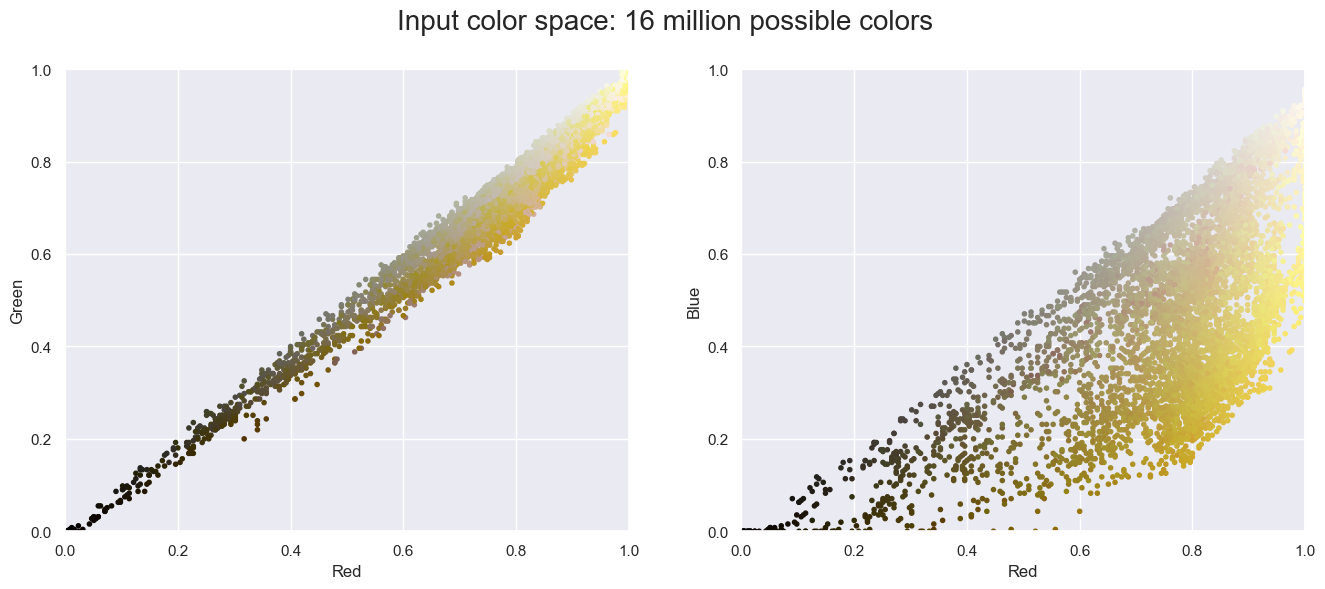

In [6]:
# visualisasi hasil fungsi plot_pixels
plot_pixels(data, title='Input color space: 16 million possible colors')

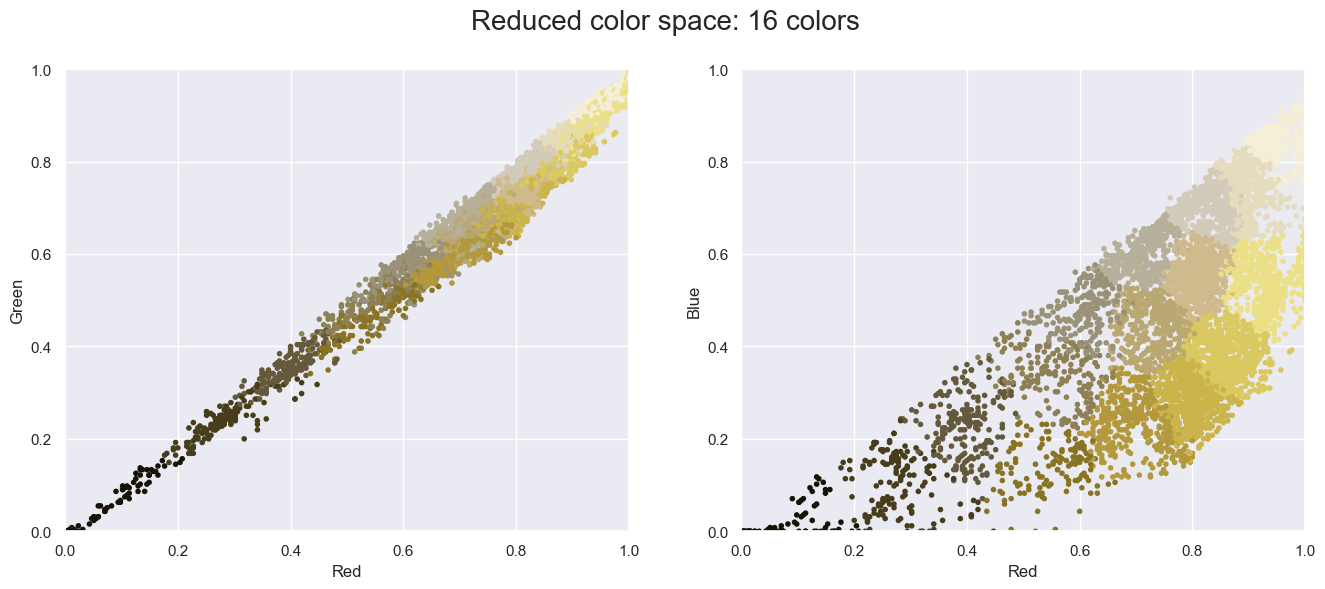

In [7]:
# menghapus jarak dari 16 warna
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

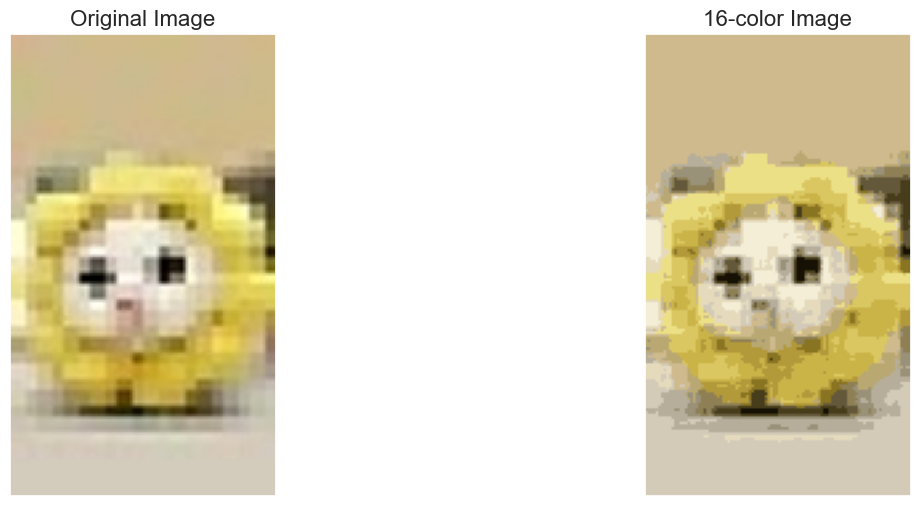

In [8]:
# menampilkan hasil gambar asli dengan hasil penghapusan jaran 16 warna
cat_recolored = new_colors.reshape(cat.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cat)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cat_recolored)
ax[1].set_title('16-color Image', size=16);

2.	Tentukan hasil Elbow Method dan visualisasi line chartnya dengan function sebagai berikut:

In [9]:
# Menentukan Hasil Elbow Method
from sklearn.cluster import KMeans

def calculate_WSS(points, kmax):
    sse = []

    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) * 2 + (points[i, 1] - curr_center[1]) * 2

        sse.append(curr_sse)

    return sse

In [10]:

# # mengetahui hasil elbow method
wss = calculate_WSS(data, 10)

wss

[-3.683964244771687e-11,
 -5.4558722109334195,
 -3.7194180319931,
 -5.912049370767072,
 -2.1166746002463923,
 0.8663832465820764,
 -3.9413786207691093,
 -0.8811820528971688,
 -3.7656768174585986,
 1.3965734789944344]

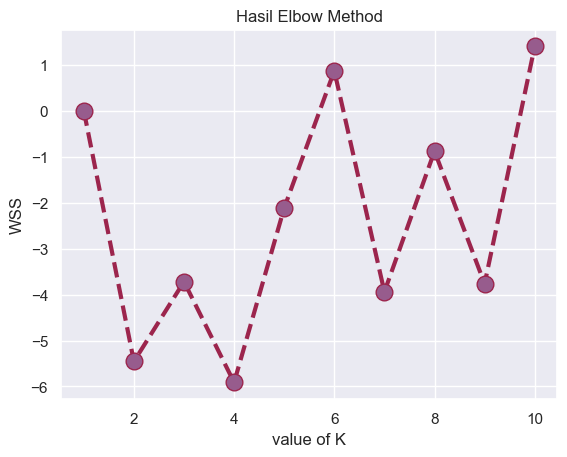

In [14]:
# Visualisasi Hasil Elbow Method dengan scatter plot
plt.plot(range(1, 11), wss, color='#9C254D', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='#975C8D', markersize=12)
plt.title('Hasil Elbow Method')
plt.xlabel('value of K')
plt.ylabel('WSS')
plt.show()

3.	Tentukan silhoutte dan line chartnya dengan function sebagai berikut:

In [12]:
# Menentukan Hasil silhoutte
from sklearn.metrics import silhouette_score
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(data)
    labels = kmeans.labels_
    sil.append(silhouette_score(data, labels, metric = 'euclidean'))

sil

[0.5480811041562159,
 0.4578541668821294,
 0.4842519509153871,
 0.5057502231917297,
 0.5351382767676783,
 0.5450998490137486,
 0.5542080747725403,
 0.54951926152479,
 0.5456436454236033]

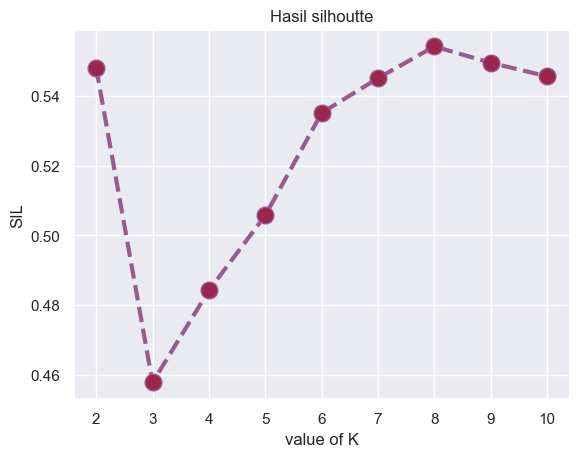

In [13]:
# Visualisasi Hasil Silhoutte dengan scatter plot
plt.plot(range(2, 11), sil, color='#975C8D', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='#9C254D', markersize=12)
plt.title('Hasil silhoutte')
plt.xlabel('value of K')
plt.ylabel('SIL')
plt.show()